__Title:__ Predicting heart disease patients using K-nearest neighbours classification


__Introduction:__ Heart disease is a medical condition that affects people worldwide. Various factors contribute to the risk of heart disease such as age, sex, cholesterol, and many more. However, it is difficult to determine which factors are the greatest factors that contribute to said disease, thus modeling data is a great way to make better predictions that can be applied to patients at risk.

The dataset used is the UCI Heart Disease Dataset for Cleveland. The data variables include: age, sex, chest pain, resting blood pressure, cholesterol,  fasting blood pressure, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, the slope of the peak exercise ST segment, ST depression induced by exercise relative to rest,  number of major vessels, and diagnosis of heart disease.

__Question:__ How can we use the most significant factors that affect heart disease to create an effective model to predict potential heart disease patients in Cleveland?



__Prelimimary Exploratory Data Analysis__

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(ggplot2)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
set.seed(15)
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) %>%
    rename("age" = X1,
          "sex" = X2,
          "cp" = X3, 
          "trestbps" = X4,
          "chol" = X5, 
          "fbs" = X6,
          "restecg" = X7, 
          "thalach" = X8,
          "exang" = X9,
          "oldpeak" = X10,
          "slope" = X11,
          "ca" = X12,
          "thal" = X13,
          "num" = X14) %>%
    mutate(ca = as.double(ca), thal = as.double(thal), sex = as_factor(sex), num = as_factor(num), cp = as_factor(cp), fbs = as_factor(fbs), restecg = as_factor(restecg), exang = as_factor(exang), slope = as_factor(slope), ca = as.integer(ca), thal = as_factor(thal)) %>%
    mutate(hasdisease = num != 0)

heart_disease_split <- initial_split(cleveland_data, prop = 0.75, strata = num) %>%
na.omit()
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)
heart_disease_train


Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.double(ca)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.double(thal)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,hasdisease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>,<lgl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,TRUE
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,FALSE
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3,TRUE
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,FALSE
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2,TRUE
53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,TRUE


___Patients at certain diagnosis levels of heart disease___}

|    |Number of patients|
|-----|-----|
|Level 0 (no heart disease)|124|
|Level 1|41|
|Leve 2|27|
|Level 3|28|
|Level 4|9|
|__Total__|__229__|

__Patients with and without heart disease__

|   |Number of patients|
|----|-----|
|without heart disease|124|
|with heart disease| 105|


Shown above is a summarized table of our data. We recorded the number of observations under each status of heart disease diagnosis. This was important to determine whether our training data had enough observations in each diagnosis of heart disease to base a model on. We realized that the number of observations for each individual diagnosis of heart disease (1-4) were minimal compared to the recordings of no heart disease (0). Because of this and the fact that the dataset describes that they were mostly focused on determining whether a patient had heart disease or not rather than gauging the status of heart disease diagnosis, we decided to classify all patients into only whether they have heart disease or not.

In [4]:
set.seed(15)
heart_disease_mean_true <- heart_disease_train %>%
    filter(hasdisease == TRUE) %>%
    select(thalach, age, chol, trestbps,oldpeak) %>%
    map_df(mean, na.rm  = TRUE)

heart_disease_mean_true

thalach,age,chol,trestbps,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139.8224,57.2243,250.9626,135.6916,1.592523


Shown above is a table of averages of the variables which we decided to include in our project journey :D

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



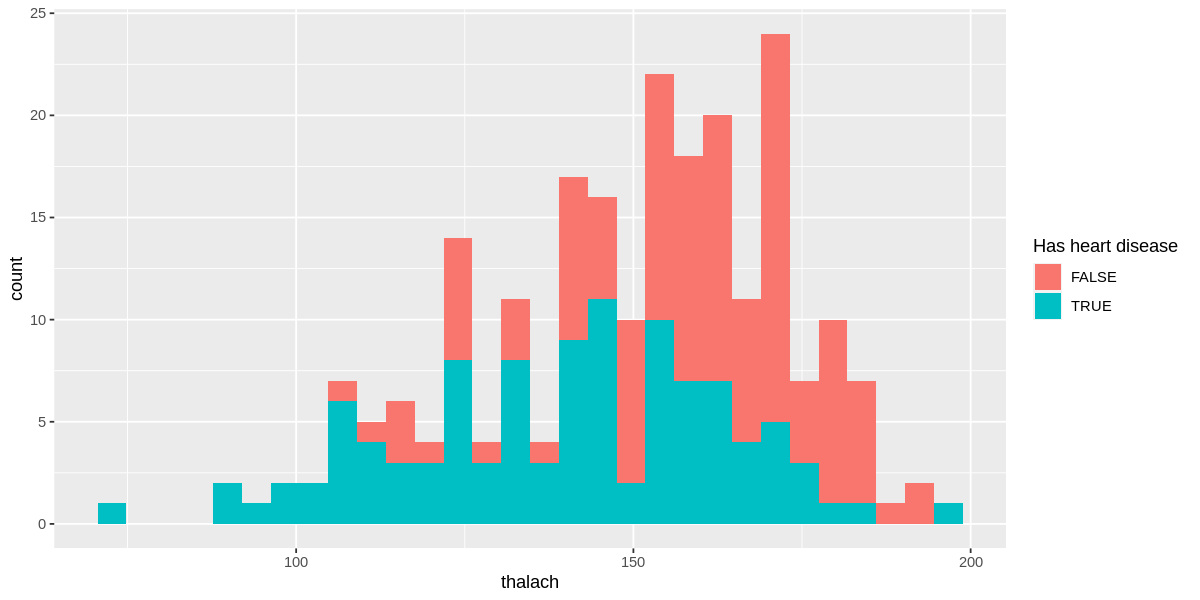

In [15]:
set.seed(15)
options(repr.plot.width = 10, repr.plot.height = 5)
thalach_plot <- ggplot(heart_disease_train,aes(x=thalach,fill=hasdisease))+
    geom_histogram()+
    labs(x="thalach",fill="Has heart disease")
thalach_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



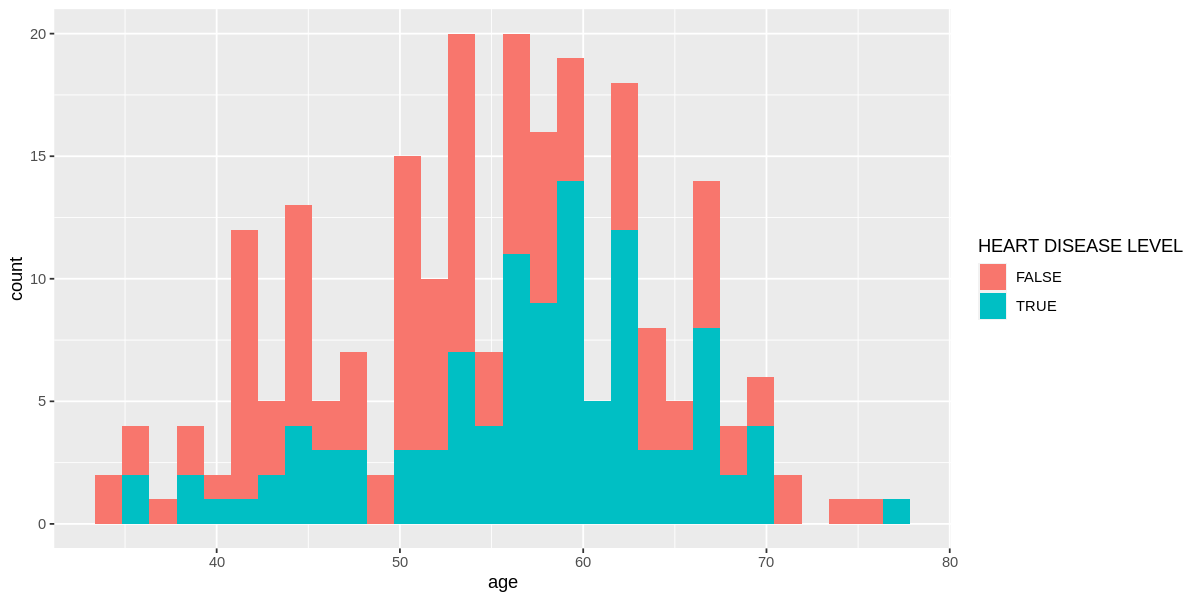

In [16]:
set.seed(15)
options(repr.plot.width = 10, repr.plot.height = 5)
age_plot <- ggplot(heart_disease_train,aes(x=age,fill=hasdisease))+
    geom_histogram()+
    labs(x="age",fill="HEART DISEASE LEVEL")
age_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



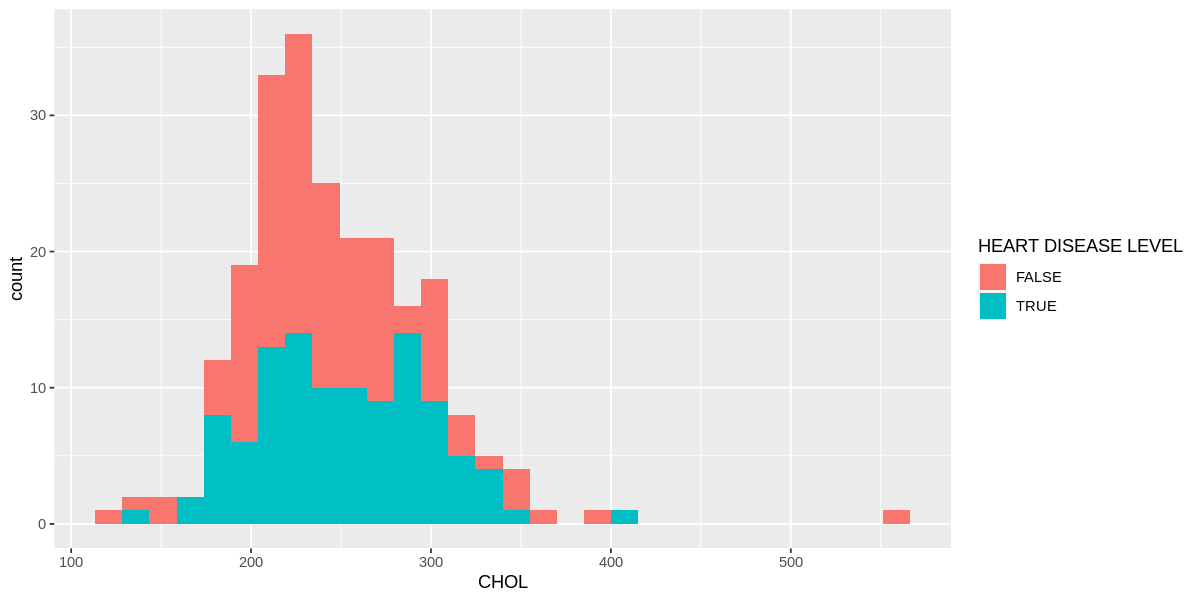

In [17]:
set.seed(15)
options(repr.plot.width = 10, repr.plot.height = 5)
chol_plot <- ggplot(heart_disease_train,aes(x=chol,fill=hasdisease))+
    geom_histogram()+
    labs(x="CHOL",fill="HEART DISEASE LEVEL")
chol_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



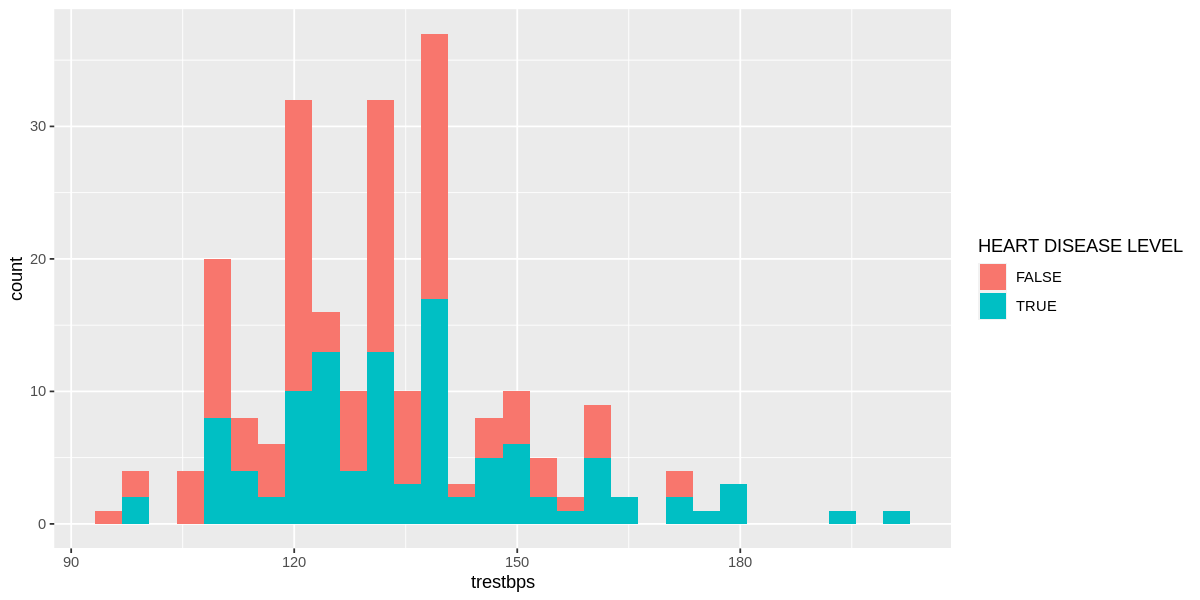

In [18]:
set.seed(15)
options(repr.plot.width = 10, repr.plot.height = 5)
trestbps_plot <- ggplot(heart_disease_train,aes(x=trestbps,fill=hasdisease))+
    geom_histogram()+
    labs(x="trestbps",fill="HEART DISEASE LEVEL")
trestbps_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



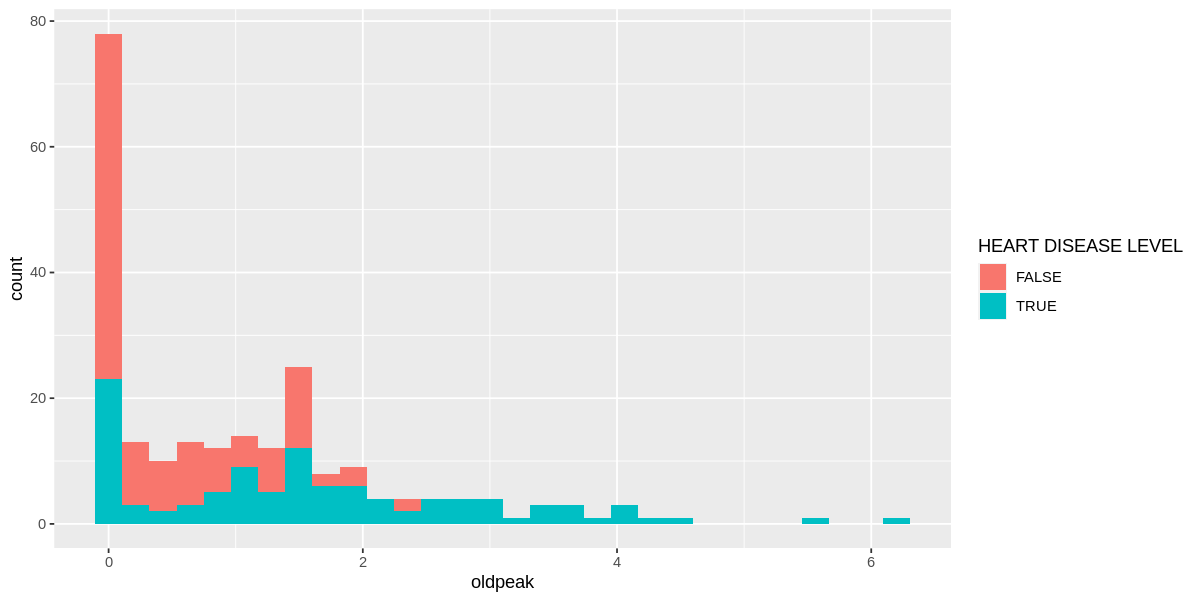

In [19]:
set.seed(15)
options(repr.plot.width = 10, repr.plot.height = 5)
oldpeak_plot <- ggplot(heart_disease_train,aes(x=oldpeak,fill=hasdisease))+
    geom_histogram()+
    labs(x="oldpeak",fill="HEART DISEASE LEVEL")
oldpeak_plot

__Method:__ Looking at the ggpairs plots, we observed the histograms that showed trends; these were the variables: age, resting blood pressure (trestbps), cholesterol (chol), maximum heart rate achieved (thalach), and ST depression induced by exercise relative to rest (oldpeak). Additionally, because using numerical values creates a more accurate knn classification, we used these columns to predict diagnosis of heart disease (num). We confirmed that these variables were significant by using histograms between the mentioned columns and num. All variables showed some correlation to heart disease. Using those variables we will make scatterplots to predict the classification of heart disease using the k nearest neighbours function. 

__Expected Outcome and Significance:__ 
Based on our current visualizations we expect to find that the 5 factors of age, thalach, cholesterol, trestbps, oldpeak would be accurate predictors of potential heart disease patients. Additionally, we expect that some of the factors will be more significant predictors than others. 
If we find which factors lead to the greatest risk of heart disease, then the model could be used to help predict if new patients may be at risk for heart disease. Additionally, by knowing which factors lead to higher risk of heart disease, patients can use that information to adapt their lifestyle as much as they can to mitigate their risk of heart disease. Some other questions we can explore include, "what are some ways people can mitigate the risk of developing hearth disease?", and "do the variables we found contribute to other health issues?"